## 데이터 프레임

* 2차원 행렬 데이터에 인덱스를 붙인 것
* 행과 열로 만들어지는 2차원 배열 구조
* R의 데이터 프레임에서 유래
* DataFrame의 각 열은 Series로 구성
* DataFrame() 함수를 사용해서 생성

In [67]:
import numpy as np
import pandas as pd

## 데이터 프레임 생성

### 리스트로 데이터 프레임 만들기
* DataFrame([list1], [list2])
* 각 list는 한 행으로 구성됨
* 행의 원소 개수가 다르면 None 값으로 지정

In [68]:
# 2차원 리스트로 데이터프레임 생성
df = pd.DataFrame([['a','b','c'], ['a', 'a','g'], ['a', 'a']])
df

,0,1,2
0,a,b,c
1,a,a,g
2,a,a,None


**자동으로 생성된 index와 column을 갖는 DataFrame 데이터**

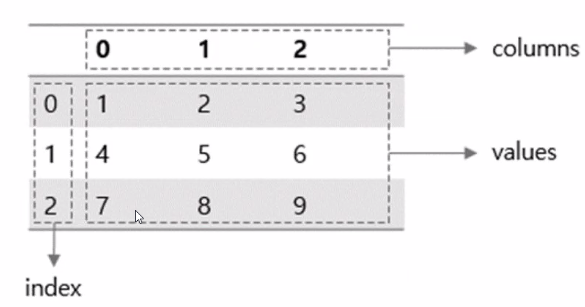

### 딕셔너리로 데이터 프레임 만들기

* dict의 key -> column

In [69]:
# 열방향 인덱스(문자) 형방향 인덱스(숫자)가 있는 데이터 프레임 생성
# 열 데이터를 dict 형태로 작성하는 게 일반적

df1 = pd.DataFrame({'A':[90, 80, 70],
                    'B': [85, 98, 75],
                    'C': [88, 99, 77],
                    'D': [87, 89, 86]})
df1

,A,B,C,D
0,90,85,88,87
1,80,98,99,89
2,70,75,77,86


In [70]:
# 딕셔너리로 데이터 프레임 생성
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2000002],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율":[0.0283, 0.0163, 0.0982,0.0141]
}

In [71]:
# 열방향 인덱스 columns = 
columns = ['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율']

# 행방향 인덱스 index = 
index = ['서울', '부산', '인천', '대구']

# DataFrame(데이터, index=, columns=)
df2 = pd.DataFrame(data, index=index, columns=columns)
df2

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


### 시리즈로 데이터 프레임 생성

* 각 Series의 인덱스 -> column

In [72]:
a = pd.Series([100, 200, 300], ['a','b','d'])
b = pd.Series([101, 201, 301], ['a','b','k'])
c = pd.Series([110, 210, 310], ['a','b','c'])

pd.DataFrame([a,b,c], index=[100,101,102])

,a,b,d,k,c
100,100.0,200.0,300.0,NaN,NaN
101,101.0,201.0,NaN,301.0,NaN
102,110.0,210.0,NaN,NaN,310.0


### csv 데이터로부터 DataFrame 생성

* 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
* 데이터 소스로부터 추출된 csv(comma separated values) 파일로부터 생성
* pandas.read_csv() 함수 사용

In [73]:
# 데이터 출처 : https://www.kaggle.com/hesh97/titanicdataset-traincsv/data

trainData = pd.read_csv('./data/train.csv')
trainData.head() # 상위 5개 정도만 출력 : head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### read_csv() 함수 파라미터

* seq : 각 데이터 값을 구별하기 위한 구분자(separator) 설정
* header : header를 무시할 경우, None 설정
* index_col : index로 사용할 column 설정
* usecols : 실제로 dataframe에 로딩할 columns만 설정

In [74]:
trainData = pd.read_csv('./data/train.csv',
                       index_col = 'PassengerId',
                       usecols = ['PassengerId', 'Survived', 'Pclass', 'Name'])
trainData

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


In [75]:
# 데이터 프레임 열인덱스
trainData.columns

Index(['Survived', 'Pclass', 'Name'], dtype='object')

### 인덱스와 컬럼의 이해

1. 인덱스(index)
    - index 속성
    - 각 아이템을 특정할 수 있는 고유의 값을 저장
    - 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능


2. 컬럼(column)
    - columns 속성
    - 각각의 특성(feature)을 나타냄
    - 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

In [76]:
df2

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


### 데이터프레임의 열방향 인덱스와 행방향 인덱스

In [77]:
# 열방향 인덱스 출력
df2.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [78]:
# 행방향 인덱스 출력
df2.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

### 행/열 인덱스 이름 설정

* index.name
* columns.names

In [79]:
# 시리즈처럼 dataFrame에서도 각 방향 인덱스에 name 속성을 지정할 수 있음
df2.index.name='도시'
df2.columns.name='특성'
df2

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


**데이터프레임의 값 접근 : values 속성**

In [80]:
# 데이터만 접근 하려면 values 속성을 사용

df2.values
# 반환값은 array 형태

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2000002, 2456016, 2473990, 0.0141]], dtype=object)

### 데이터 프레임의 데이터 파악하기

* shape 속성 (row, column)
* describe() 함수 : 숫자형 데이터의 통계치 계산
* info() 함수 : 데이터 타입, 각 아이템의 개수 등 출력

In [81]:
#  DataFrame의 개요 출력
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 서울 to 대구
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             4 non-null      object 
 1   2015           4 non-null      int64  
 2   2010           4 non-null      int64  
 3   2005           4 non-null      int64  
 4   2000           4 non-null      int64  
 5   2010-2015 증가율  4 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 224.0+ bytes


**describe() : DataFrame의 숫자형 데이터의 기술통계 출력**

In [82]:
# DataFrame의 통계적 개요 출력
df2.describe()

특성,2015,2010,2005,2000,2010-2015 증가율
count,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000
mean,4.677388e+06,4.414178e+06,4.562197e+06,4.612434e+06,0.039225
std,3.507776e+06,3.524531e+06,3.500545e+06,3.538749e+06,0.039809
min,2.466052e+06,2.000002e+06,2.456016e+06,2.466338e+06,0.014100
25%,2.784351e+06,2.474027e+06,2.502264e+06,2.472077e+06,0.015750
50%,3.169594e+06,3.012613e+06,3.015114e+06,3.064714e+06,0.022300
75%,5.062631e+06,4.952764e+06,5.075047e+06,5.205071e+06,0.045775
max,9.904312e+06,9.631482e+06,9.762546e+06,9.853972e+06,0.098200


**shape : 데이터 프레임의 행, 렬 개수 출력**

In [83]:
# (행, 열)의 개수 출력
df2.shape

(4, 6)

### 데이터 프레임 전치

* pandas의 데이터 프레임은 전치를 포함해서 Numpy 2차원 배열의 대부분 속성이나 메서드를 지원

* 전치 : 행과 열을 바꾸는 기능

In [84]:
# data 확인
df2

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


In [85]:
# df2 전치 : .T 속성
dfT = df2.T
dfT
# 원본데이터를 변경하지 않는다.

도시,서울,부산,인천,대구
특성,,,,
지역,수도권,경상권,수도권,경상권
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2000002
2005,9762546,3512547,2517680,2456016
2000,9853972,3655437,2466338,2473990
2010-2015 증가율,0.0283,0.0163,0.0982,0.0141


### 데이터 프레임 내용 변경

: 열추가, 열삭제, 내용 갱신

In [86]:
# 사용 예제 
df2

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2000002,2456016,2473990,0.0141


#### 해당열이 있으면 내용 갱신, 열이 없으면 추가
- 열추가 : df[열이름(key)]=values
- 열 내용 갱신 : df[열이름(key)]=values

In [87]:
# 열 내용 변경 : 증가율을 퍼센트값으로 변경
df2['2010-2015 증가율'] = df2['2010-2015 증가율']*100
df2

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2000002,2456016,2473990,1.41


In [88]:
# 열 추가
df2['2005-2015 증가율']=((df2['2015']-df2['2005'])/df2['2005']*100).round(2)
df2

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2015 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,1.45
부산,경상권,3448737,3393191,3512547,3655437,1.63,-1.82
인천,수도권,2890451,2632035,2517680,2466338,9.82,14.81
대구,경상권,2466052,2000002,2456016,2473990,1.41,0.41


In [89]:
p = ((df2['2015']-df2['2005'])/df2['2005']*100).round(2)
df2['2005-2015 증가율(%)']=p.map('{}%'.format)
df2

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2015 증가율,2005-2015 증가율(%)
도시,,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,1.45,1.45%
부산,경상권,3448737,3393191,3512547,3655437,1.63,-1.82,-1.82%
인천,수도권,2890451,2632035,2517680,2466338,9.82,14.81,14.81%
대구,경상권,2466052,2000002,2456016,2473990,1.41,0.41,0.41%


In [90]:
# 열삭제, del df[삭제열]

del df2['2010-2015 증가율']
df2

특성,지역,2015,2010,2005,2000,2005-2015 증가율,2005-2015 증가율(%)
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,1.45,1.45%
부산,경상권,3448737,3393191,3512547,3655437,-1.82,-1.82%
인천,수도권,2890451,2632035,2517680,2466338,14.81,14.81%
대구,경상권,2466052,2000002,2456016,2473990,0.41,0.41%


### 데이터 프레임 인덱싱
1. 열인덱싱
2. 인덱서를 사용하지 않는 행 인덱싱

- [ ]기호를 이용해서 인덱싱할 때 주의점 : [ ]기호는 열 위주 인덱싱이 원칙

#### 1. 열인덱싱

    - 열 라벨(컬럼명)을 키값으로 생각하고 인덱싱한다.
    - 인덱스로 라벨값을 하나 넣으면 시리즈 객체가 반환
    - 라벨의 배열이나 리스트를 넣으면 부분적 df 가 반환

In [91]:
# 인덱스로 라벨값 1 개 사용
df2['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [92]:
# 열 1개를 접근할때는 . 연산자 사용 가능 : df.컬럼명
df2.지역

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [93]:
# 지역 컬럼 데이터유형 확인
type(df2['지역'])
# pandas.core.series.Series

pandas.core.series.Series

In [94]:
# 열을 추출할 때 df로 반환받고자 하면 []를 사용
# 리스트로 인덱싱 : df로 반환

df2[['지역']]

특성,지역
도시,
서울,수도권
부산,경상권
인천,수도권
대구,경상권


In [95]:
# pandas.core.frame.DataFrame
type(df2[['지역']])

pandas.core.frame.DataFrame

In [96]:
# 여러 개의 열을 추출
# []리스트 사용 : df 반환

df2[['2010','2015']]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2000002,2466052


#### pandas 데이터 프레임에 열이름(컬럼명)이 문자열일 경우에는
- 수치 인덱스를 사용할 수 없음
- 위치 인덱싱 기능을 사용할 수 없음 : keyerror 발생

In [97]:
df2[1]

KeyError: 1

In [ ]:
# 위치적으로 맨 처음 열을 반환받기 위해 위치 인덱스 사용
try : 
    df2[0] # keyerror 발생
except Exception as e :
    print(type(e))

# df2에는 컬럼명에 0 이 없음 : 위치인덱스 사용 불가

- 위치 인덱싱처럼 보이는 예제

In [ ]:
# 예제 df3 생성
# numpy의 arange 함수 사용해서 0-11범위의 정수 생성 후 
# reshape 함수 이용하여 3행 4열로 배치

In [ ]:
df3 = pd.DataFrame(np.arange(12).reshape(3,4))
df3

In [ ]:
# 컬럼명이 숫자로 되어 있는 df의 접근
df3[0]

In [ ]:
df3[[1,2]]

#### 2. 행 단위 인덱싱
- 행단위 인덱싱을 하고자 하면 인덱서라는 특수 기능을 사용하지 않는 경우 슬라이싱을 해야 함(인덱서는 바로 뒤에 배움)
- 인덱스 값이 문자(라벨)면 문자슬라이싱도 가능하다.

In [ ]:
# 예제 데이터프레임
df2

In [ ]:
# 1행 추출 [:1] - 슬라이싱 사용

df2[:1]

In [ ]:
# 1행 추출
df2[0:1]

In [ ]:
# [시작값:끝값+1]

df2[1:3]

In [ ]:
# 행 인덱스 '서울'부터 '부산'까지 추출

df2['서울':'부산']

#### 3. 개별요소 접근 [열][행]

In [ ]:
df2['2015']['서울']

In [ ]:
# 원소값의 형태가 출력 - 정수
type(df2['2015']['서울'])

In [ ]:
df2['2015']['서울':'부산']

In [ ]:
df2[['2015','2010','2005']]['서울':'부산']

- 데이터프레임은 열기준으로 접근 원칙 : [열이름]
- 행기준 접근을 위해서는 슬라이싱을 적용 : [행이름:행이름]
- 행과열을 같이 적용(개별요소) : [열이름][행이름]